In [1]:
import sys
sys.path.append('..')
from utils import *
sys.path.append('../attacks/')
from fgsm import *
sys.path.append('../models/')
from resnet_50 import *

In [2]:
from torchvision import datasets
imgs = datasets.ImageFolder('~/dataset/imagenet1000/val')

In [3]:
resnet50_in = resnet50_IN()
resnet50_in = resnet50_in.cuda()
resnet50_in = resnet50_in.eval()

In [4]:
block_size = 8
alpha = 0.1
beta = 1/255

In [5]:
import torch
from torchvision import transforms
import numpy as np

In [6]:
import cv2
wm = cv2.imread('../img/logo.jpg')
wm = cv2.cvtColor(wm,cv2.COLOR_BGR2RGB)

In [7]:
from torch import norm

In [17]:
filename = '/home/hancy/code/adv_wm/record/220926_fgsm_direct_resnet50.txt'


In [18]:
from tqdm import tqdm
with open(filename,'a') as file:
    for i in tqdm(range(len(imgs)), desc='Processing'):
        img = np.array(imgs[i][0])
        img = addborder(img,block_size)
        img = transforms.ToTensor()(img).cuda()
        target = torch.tensor([imgs[i][1]]).cuda()
        pred_label = resnet50_in(img.unsqueeze(0)).argmax().item()
        wm_to_embed = cv2.resize(wm,dsize=(img.shape[2],img.shape[1]),fx=1,fy=1,interpolation=cv2.INTER_LINEAR)
        wm_to_embed = transforms.ToTensor()(wm_to_embed).cuda()
        perd_img = fgsm_direct(img,target,wm_to_embed,resnet50_in,alpha,beta,block_size)
        wm_extracted = extract_wm(img,perd_img,alpha,block_size)
        res = resnet50_in(perd_img.unsqueeze(0))
        perd_label = res.argmax().item()
        l2_norm = norm(wm_extracted-wm_to_embed).item()
        file.write('{},{},{},{},{}\n'.format(i,imgs[i][1],pred_label,perd_label,l2_norm))

Processing: 100%|██████████| 3923/3923 [09:39<00:00,  6.77it/s]


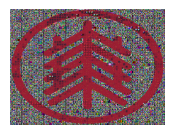

In [12]:
pltshow(wm_extracted)

In [14]:
norm(wm_extracted-wm_to_embed)

tensor(46.0695, device='cuda:0', dtype=torch.float64)